In [2]:
# packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 999

display(HTML("<style>.container {width:90% !important;}</style>"))
sys.path.append("/Users/mariapalafox/Desktop/Toolbox")
from all_funx import *
from maplib import *

# filtering CADD maxmean and pos_specific files with detected/not pos_ids (dbNSFP final accounting)

In [5]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/RESULT_CADDv14_pos_overlap_dbNSFPcoordinates/")
# Pmap_filteron_posID.py
# GOAL filtering already made CADD maxmean score files with 
# detected and not detecte Cys and Lys positions for map paper. 
# using updated count of uniprot IDs as 3,840 (number shared post dbNSFP mapping)
def filter_by_col(df, outname, fil, filcol):
    fil_list = fil[filcol].tolist()
    filtered = addcolumnconditionalDrop(fil_list, df, filcol, 'in_set')
    print("filter file shape: ", filtered.shape)
#     filtered.to_csv(outname, index=False)
    return filtered
# search files with pos_ID (ukbid_aapos)
detfilter = "PULL_annotations/SEARCH_hg19_DETECTED_104475.csv"
notfilter = "PULL_annotations/SEARCH_hg19_NOT_DETECTED_1222911.csv"
detfil = pd.read_csv(detfilter, usecols=['pos_ID'])
notfil = pd.read_csv(notfilter, usecols=['pos_ID'])
detfil.drop_duplicates(keep='first', inplace=True)
notfil.drop_duplicates(keep='first', inplace=True)
print("detected post drop duplicate shape of df: ", detfil.shape)
print("not detected post drop duplicate shape: ", notfil.shape)
print(detfil.head(2))
print()
print(notfil.head(2))
# saving non redundant on pos_ID search files
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/BUG_FIX/NOT_3840_FILTERED")
# detfil.to_csv("FILTER_detected_pos_ID_14925.csv", index=False)
# notfil.to_csv("FILTER_notdetected_pos_ID_174702.csv", index=False)
# Knot = pd.read_csv("CADDspecific_K_notdetected_1015295x2rows.csv")
# Cnot = pd.read_csv("CADDspecific_C_notdetected_244506x2rows.csv")
# Kdet = pd.read_csv("CADDspecific_K_detected_63014x2rows.csv")
# Cdet = pd.read_csv("CADDspecific_C_detected_43050x2rows.csv")

Knot3 = pd.read_csv("POSspecific_K_notdetected_maxmean_145027x2pos.csv")
Cnot3 = pd.read_csv("POSspecific_C_notdetected_maxmean_34930x2pos.csv")
Kdet3 = pd.read_csv("POSspecific_K_detected_maxmean_9002x2pos.csv")
Cdet3 = pd.read_csv("POSspecific_C_detected_maxmean_6150x2pos.csv")

# notcols = ['pos_id19', 'pos_id38', 'xref', 'matched_target', 'lost_amino',
#        'gained_amino', 'Amino_acids', 'pos_ID',
#        'geneNamePrimary', 'CADD_score', 'assembly']
# Knot.columns = notcols
# Cnot.columns = notcols
Knot3.columns = ['pos_ID', 'xref', 'geneNamePrimary', 'CADD_avg', 'CADD_max', 'assembly']
Cnot3.columns = ['pos_ID', 'xref', 'geneNamePrimary', 'CADD_avg', 'CADD_max', 'assembly']
Kdet3.columns = ['pos_ID', 'xref', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'geneNamePrimary', 'CADD_avg', 'CADD_max', 'assembly']
Cdet3.columns = ['pos_ID', 'xref', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'geneNamePrimary', 'CADD_avg', 'CADD_max','assembly']
dfls = [Knot3, Cnot3, Kdet3, Cdet3]
for i in dfls:
    print(i.columns)
    print()
# K detected 
Kdet2 = pd.merge(Kdet, detfil, how='inner', on=['pos_ID'])
# C detected 
Cdet2 = pd.merge(Cdet, detfil, how = 'inner', on=['pos_ID'])
 # K not detected
Knot2 = pd.merge(Knot, notfil, how='inner', on=['pos_ID'])
# C not detected 
Cnot2 = pd.merge(Cnot, notfil, how='inner', on=['pos_ID'])
# K detected 
Kdet4 = pd.merge(Kdet3, detfil, how='inner', on=['pos_ID'])
# C detected 
Cdet4 = pd.merge(Cdet3, detfil, how = 'inner', on=['pos_ID'])
 # K not detected
Knot4 = pd.merge(Knot3, notfil, how='inner', on=['pos_ID'])
# C not detected 
Cnot4 = pd.merge(Cnot3, notfil, how='inner', on=['pos_ID'])

Knot2.to_csv("CADDspecific_K_notdetected_1222911x2.csv")
Cnot2.to_csv("CADDspecific_C_notdetected_1222911x2.csv")
Kdet2.to_csv("CADDspecific_K_detected_104474x2.csv")
Cdet2.to_csv("CADDspecific_C_detected_104474x2.csv")
Knot4.to_csv("POSspecific_K_notdetected_maxmean_140652x2.csv")
Cnot4.to_csv("POSspecific_C_notdetected_maxmean_34050x2.csv")
Kdet4.to_csv("POSspecific_K_detected_maxmean_8868x2.csv")
Cdet4.to_csv("POSspecific_C_detected_maxmean_6057x2.csv")

detected post drop duplicate shape of df:  (14925, 1)
not detected post drop duplicate shape:  (174702, 1)
        pos_ID
0  Q3ZCM7_C354
7  Q3ZCM7_C303

        pos_ID
0  Q3ZCM7_K392
7  Q3ZCM7_K379


# table comparing columns (regional, conservation, and mutation density) between hg19 and hg38

**MERGE file has CADD columns specific to each assembly, comparing these values for same set of detected coordinates**

In [3]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES/")

detmerge = pd.read_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475.csv", low_memory=False)
detdescribe = detmerge.describe()
# detdescribe.to_csv("MERGE_DET_DESCRIBE.csv")
detdescribe

notmerge = pd.read_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911.csv", low_memory=False)
notdescribe = notmerge.describe()
notdescribe.to_csv("MERGE_NOT_DET_DESCRIBE.csv")


,matched_aapos,matched_index,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Lys_reactivity,codonpos,codon_degeneracy,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,RawScore_hg19,PHRED_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38,RawScore_hg38,PHRED_hg38
count,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,9807.000000,30541.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104468.000000,104468.000000,104475.000000,104475.000000,104475.000000,104475.000000,101659.000000,1.016590e+05,104475.000000,104475.000000,104447.000000,102421.000000,102421.000000,102421.000000,104195.000000,104195.000000,104195.000000,104363.000000,104363.000000,104363.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,104475.000000,87399.000000,8.739900e+04,69168.000000,69168.000000,104447.000000,104193.000000,104193.000000,104193.000000,104342.000000,104342.000000,104342.000000,104440.000000,104440.000000,104440.000000,104239.000000,104398.000000
mean,351.526767,0.453362,25.305605,24.054814,1.250791,5.962427,7.897548,1.884049,0.455477,0.950433,0.573223,0.853870,0.620534,0.493464,0.053595,0.820250,0.910806,0.925576,0.403298,1.561640,2.959281,1064.140482,1.137043e-09,5.249858,3.970090,146.598055,0.091807,0.408871,5.407797,1.664869,5.637747,60.205279,18.727882,61.593419,610.080852,3.094321,24.054814,0.493466,0.053596,0.846978,0.922099,0.908942,0.390775,2.405932,4.983427,2753.385220,1.963920e-08,17.276933,4.992742,32.283215,0.089248,0.394259,12.373816,1.648377,5.548360,138.869717,18.450814,60.063194,1398.902911,5.055787,25.681465
std,512.694518,1.022412,4.572920,5.265911,2.662344,3.201143,3.019020,0.746987,0.838750,0.120271,0.274230,0.234544,0.232996,0.111192,0.052717,0.292555,0.252015,0.239505,0.342720,0.970815,1.882928,1289.474104,3.161568e-08,0.657889,2.455545,3858.878754,0.311276,0.672054,3.044166,1.762804,3.070884,18.368963,11.695135,18.339498,132.626749,0.991271,5.265911,0.111193,0.052721,0.262146,0.242784,0.268523,0.297954,1.393662,3.256797,3207.141926,3.171466e-07,2.995495,15.948119,936.091690,0.305952,0.660648,5.314361,1.730947,2.998512,34.735991,11.257861,17.474961,257.630979,9.411403,13.357122
min,2.000000,0.000000,0.001000,0.001000,-16.700000,0.740000,0.100000,1.000000,0.000000,0.053246,0.000100,0.000200,0.002200,0.198675,0.000000,0.000000,0.000000,0.000000,-3.974000,-7.258000,-7.510000,21.300000,0.000000e+00,0.000000,-12.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.763825,0.001000,0.198675,0.000000,0.000000,0.000000,0.000000,-4.505000,-7.475000,-9.876000,38.600000,0.000000e+00,0.023900,-39.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,-1.260155,0.001000
25%,95.000000,0.000000,23.000000,22.600000,-0.200000,4.330000,5.800000,1.000000,0.000000,0.975998,0.348420,0.862360,0.454780,0.403974,0.013333,0.804000,0.995000,0.999000,0.450000,0.891000,1.318000,399.500000,4.094760e-162,4.950000,3.430000,20.000000,0.000000,0.000000,3.000000,0.000000,3.000000,49.000000,11.000000,49.000000,541.000000,2.504595,22.600000,0.403974,0.013333,0.853000,0.999000,1.000000,0.418000,1.442000,1.991000,810.270000,5.609950e-239,16.600000,1.560000,9.000000,0.000000,0

## checking in null values in my files match CADD website for example input chr10 47330-47332...
- my null values for GERP match website. 
- conservation scores do not change if an annotation calls intergenic vs coding region (phyloP, PhCons..GERP)
- CADD scores do not change based on annotation from VEP also, **not sure why some PHRED score have null values but the CADD_phred scores from dbNSFP and pulled from CADD37 are correct**

## solution: 
- re running hoffman script to break up origianl full annotation cadd38 files into chr chunks
- problem with origianl files in column phred raw score '\t missing'


In [21]:
# selects any rows if column value has nan
# simpledet[simpledet.isnull().any(axis=1)]
nullcadd = simpledet[simpledet.PHRED_hg38.isnull()]
nullcadd.head(10)

,pos_id19,pos_id38,pos_ID,CADD_phred_hg38,CADD_phred_hg19,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,RawScore_hg19,PHRED_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38,RawScore_hg38,PHRED_hg38
3997,10_106019518_A_C,10_104259760_A_C,P78417_K110,26.1,24.9,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,3.193,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,2.0,5.0,1.0,42.0,41.0,47.0,511.0,3.444523,24.9,0.437086,0.013333,0.989,1.000,1.0,0.475,3.370,5.173,2532.92,7.625010e-223,18.7,15.30,11.0,0.0,0.0,11.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
3998,10_106019518_A_G,10_104259760_A_G,P78417_K110,30.0,27.9,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,3.193,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,2.0,5.0,1.0,42.0,41.0,47.0,511.0,3.987084,27.9,0.437086,0.013333,0.989,1.000,1.0,0.475,3.370,5.173,2532.92,7.625010e-223,18.7,15.30,11.0,0.0,0.0,11.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
3999,10_106019519_A_C,10_104259761_A_C,P78417_K110,27.5,27.1,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,2.248,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.905629,27.1,0.437086,0.013333,0.990,1.000,1.0,0.475,2.018,4.639,2532.92,7.625010e-223,18.7,7.32,11.0,0.0,0.0,12.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
4000,10_106019519_A_G,10_104259761_A_G,P78417_K110,22.8,22.6,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,2.248,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,2.517407,22.6,0.437086,0.013333,0.990,1.000,1.0,0.475,2.018,4.639,2532.92,7.625010e-223,18.7,7.32,11.0,0.0,0.0,12.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
4001,10_106019519_A_T,10_104259761_A_T,P78417_K110,27.9,27.9,0.437086,0.013333,0.997,1.000,1.000,0.478,2.239,2.248,733.4,9.986630e-100,5.57,5.57,67.0,0.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.992958,27.9,0.437086,0.013333,0.990,1.000,1.0,0.475,2.018,4.639,2532.92,7.625010e-223,18.7,7.32,11.0,0.0,0.0,12.0,5.0,0.0,107.0,41.0,44.0,1213.0,NaN,NaN
4002,10_106019520_A_C,10_104259762_A_C,P78417_K110,26.3,25.2,0.443709,0.013333,0.997,1.000,1.000,0.478,0.997,1.628,733.4,9.986630e-100,5.57,3.16,67.0,1.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.536724,25.2,0.443709,0.013333,0.989,0.999,1.0,0.475,0.418,1.283,2532.92,7.625010e-223,18.7,18.70,53.0,1.0,0.0,12.0,5.0,0.0,106.0,41.0,44.0,1213.0,NaN,NaN
4003,10_106019520_A_T,10_104259762_A_T,P78417_K110,26.2,25.2,0.443709,0.013333,0.997,1.000,1.000,0.478,0.997,1.628,733.4,9.986630e-100,5.57,3.16,67.0,1.0,0.0,3.0,5.0,1.0,42.0,41.0,47.0,511.0,3.542553,25.2,0.443709,0.013333,0.989,0.999,1.0,0.475,0.418,1.283,2532.92,7.625010e-223,18.7,18.70,53.0,1.0,0.0,12.0,5.0,0.0,106.0,41.0,44.0,1213.0,NaN,NaN
11599,11_101985094_A_C,11_102114363_A_C,P46937_K181,27.0,24.1,0.410596,0.013333,0.997,0.865,0.996,0.457,0.975,3.531,806.8,2.233160e-137,5.74,4.59,93.0,0.0,0.0,3.0,3.0,7.0,57.0,18.0,70.0,681.0,3.196711,24.1,0.410596,0.013333,0.986,0.986,1.0,0.475,3.339,6.735,2886.89,3.780080e-245,19.7,17.40,33.0,0.0,0.0,7.0,3.0,7.0,131.0,18.0,72.0,1576.0,NaN,NaN
11600,11_101985094_A_G,11_102114363_A_G,P46937_K181,28.5,24.4,0.410596,0.013333,0.997,0.865,0.996,0.457,0.975,3.531,806.8,2.233160e-137,5.74,4.59,93.0,0.0,0.0,3.0,3.0,7.0,57.0,18.0,70.0,681.0,3.277657,24.4,0.410596,0.013333,0.986,0.986,1.0,0.475,3.339,6.735,2886.89,3.780080e-245,19.7,17.40,33.0,0.0,0.0,7.0,3.0,7.0,131.0,18.0,72.0,1576.0,NaN,NaN
11601,11_101985095_A_C,11_102114364_A_C,P46937_K181,27.0,25.4,0.417219,0.013333,0.997,0.978,1.000,0.457,2.191,5.124,806.8,2.233160e-

# merging simplified detected and not DF's to create stats table with columns (regional, conservation, mutation density) for ALL MY DATA (detected and not postions)

In [71]:
keepmedet = ['pos_id19', 'pos_id38', 'pos_ID', 'CADD_phred_hg38', 'CADD_phred_hg19','GC_hg19', 'CpG_hg19', 'priPhCons_hg19',
       'mamPhCons_hg19', 'verPhCons_hg19', 'priPhyloP_hg19', 'mamPhyloP_hg19',
       'verPhyloP_hg19', 'GerpRS_hg19', 'GerpRSpval_hg19', 'GerpN_hg19',
       'GerpS_hg19', 'Dist2Mutation_hg19', 'Freq100bp_hg19', 'Rare100bp_hg19',
       'Sngl100bp_hg19', 'Freq1000bp_hg19', 'Rare1000bp_hg19',
       'Sngl1000bp_hg19', 'Freq10000bp_hg19', 'Rare10000bp_hg19',
       'Sngl10000bp_hg19', 'GC_hg38',
       'CpG_hg38', 'priPhCons_hg38', 'mamPhCons_hg38', 'verPhCons_hg38',
       'priPhyloP_hg38', 'mamPhyloP_hg38', 'verPhyloP_hg38', 'GerpRS_hg38',
       'GerpRSpval_hg38', 'GerpN_hg38', 'GerpS_hg38', 'Dist2Mutation_hg38',
       'Freq100bp_hg38', 'Rare100bp_hg38', 'Sngl100bp_hg38', 'Freq1000bp_hg38',
       'Rare1000bp_hg38', 'Sngl1000bp_hg38', 'Freq10000bp_hg38',
       'Rare10000bp_hg38', 'Sngl10000bp_hg38']
simpledet = detmerge[keepmedet].copy()
simplenot = notmerge[keepmedet].copy()

simpledet['GROUP'] = 'detected'
simplenot['GROUP'] = 'notdetected'
combo = pd.concat([simpledet, simplenot], ignore_index=True)
combo.to_csv("MERGE_COMBO_1327386.csv")

In [78]:
combodescribe = combo.describe()
combodescribe.to_csv("MERGE_COMBO_DESCRIBE.csv")

,CADD_phred_hg38,CADD_phred_hg19,GC_hg19,CpG_hg19,priPhCons_hg19,mamPhCons_hg19,verPhCons_hg19,priPhyloP_hg19,mamPhyloP_hg19,verPhyloP_hg19,GerpRS_hg19,GerpRSpval_hg19,GerpN_hg19,GerpS_hg19,Dist2Mutation_hg19,Freq100bp_hg19,Rare100bp_hg19,Sngl100bp_hg19,Freq1000bp_hg19,Rare1000bp_hg19,Sngl1000bp_hg19,Freq10000bp_hg19,Rare10000bp_hg19,Sngl10000bp_hg19,GC_hg38,CpG_hg38,priPhCons_hg38,mamPhCons_hg38,verPhCons_hg38,priPhyloP_hg38,mamPhyloP_hg38,verPhyloP_hg38,GerpRS_hg38,GerpRSpval_hg38,GerpN_hg38,GerpS_hg38,Dist2Mutation_hg38,Freq100bp_hg38,Rare100bp_hg38,Sngl100bp_hg38,Freq1000bp_hg38,Rare1000bp_hg38,Sngl1000bp_hg38,Freq10000bp_hg38,Rare10000bp_hg38,Sngl10000bp_hg38
count,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1326763.0000,1326854.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1278124.0000,1278124.0000,1327386.0000,1327386.0000,1327260.0000,1302753.0000,1302753.0000,1302753.0000,1323081.0000,1323081.0000,1323081.0000,1325867.0000,1325867.0000,1325867.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1327386.0000,1062918.0000,1062918.0000,902926.0000,902926.0000,1327260.0000,1322807.0000,1322807.0000,1322807.0000,1325032.0000,1325032.0000,1325032.0000,1326210.0000,1326210.0000,1326210.0000
mean,24.8748,23.7157,0.4711,0.0464,0.8113,0.8962,0.9127,0.3987,1.4954,2.7461,1182.7606,0.0000,5.2932,3.9352,196.0112,0.0949,0.3953,5.3363,1.5526,5.4515,58.3483,17.6204,59.5938,589.6877,0.4711,0.0464,0.8407,0.9134,0.9053,0.3932,2.3143,4.6338,2854.9434,0.0000,16.7635,4.5024,124.1806,0.0927,0.3841,12.3027,1.5353,5.3779,134.7930,17.3660,58.2803,1355.8425
std,4.3717,5.1847,0.1113,0.0488,0.3008,0.2715,0.2577,0.3307,0.9602,1.8347,1437.7391,0.0000,0.6711,2.4128,4411.9225,0.3182,0.6593,2.9313,1.6537,2.9720,16.7273,11.0152,17.2565,117.4078,0.1113,0.0488,0.2700,0.2553,0.2721,0.2844,1.3767,3.1426,3645.4797,0.0000,3.3211,15.9294,3362.1949,0.3147,0.6506,5.0591,1.6162,2.9136,31.6217,10.6121,16.4463,226.9864
min,0.0010,0.0010,0.1788,0.0000,0.0000,0.0000,0.0000,-4.7080,-7.4840,-7.5100,14.3000,0.0000,0.0000,-12.3000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1788,0.0000,0.0000,0.0000,0.0000,-4.9140,-9.1140,-13.9330,23.1200,0.0000,0.0000,-39.5000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000
25%,22.8000,22.4000,0.3841,0.0133,0.7850,0.9920,0.9990,0.4500,0.8090,1.1470,416.1000,0.0000,5.0300,3.2500,20.0000,0.0000,0.0000,3.0000,0.0000,3.0000,48.0000,10.0000,48.0000,531.0000,0.3841,0.0133,0.8440,0.9980,1.0000,0.4520,1.2350,1.7850,735.5400,0.0000,15.5000,1.0400,9.0000,0.0000,0.0000,9.0000,0.0000,3.0000,116.0000,10.0000,48.0000,1242.0000
50%,24.6000,24.2000,0.4570,0.0267,0.9720,1.0000,1.0000,0.4920,1.9600,2.7820,611.4000,0.0000,5.4400,4.7900,34.0000,0.0000,0.0000,5.0000,1.0000,5.0000,56.0000,15.0000,58.0000,574.0000,0.4570,0.0267,0.9750,1.0000,1.0000,0.4690,3.0050,4.5960,1589.8700,0.0000,18.1000,9.7800,16.0000,0.0000,0.0000,12.0000,1.0000,5.0000,130.0000,15.0000,57.0000,1323.0000
75%,27.4000,26.7000,0.5563,0.0667,0.9940,1.0000,1.0000,0.5300,2.2060,4.5220,1156.5000,0.0000,5.7300,5.5100,56.0000,0.0000,1.0000,7.0000,2.0000,7.0000,66.0000,23.0000,68.0000,633.0000,0.5563,0.0667,0.9930,1.0000,1.0000,0.4750,3.3520,7.6240,3195.4300,0.0000,19.2000,15.8000,25.0000,0.0000,1.0000,15.0000,2.0000,7.0000,147.0000,23.0000,67.0000,1441.0000
max,59.0000,54.0000,0.9470,0.4267,0.9990,1.0000,1.0000,0.6510,2.9380,6.4210,10245.9000,0.0000,6.1700,6.1700,292586.0000,5.0000,7.0000,38.0000,23.0000,53.0000,271.0000,126.0000,202.0000,1519.0000,0.9470,0.4267,0.9990,1.0000,1.0000,0.5950,4.4940,11.2950,26309.9000,0.0000,19.8000,19.8000,112928.0000,5.0000,8.0000,67.0000,22.0000,57.0000,482.0000,105.0000,190.0000,3195.0000


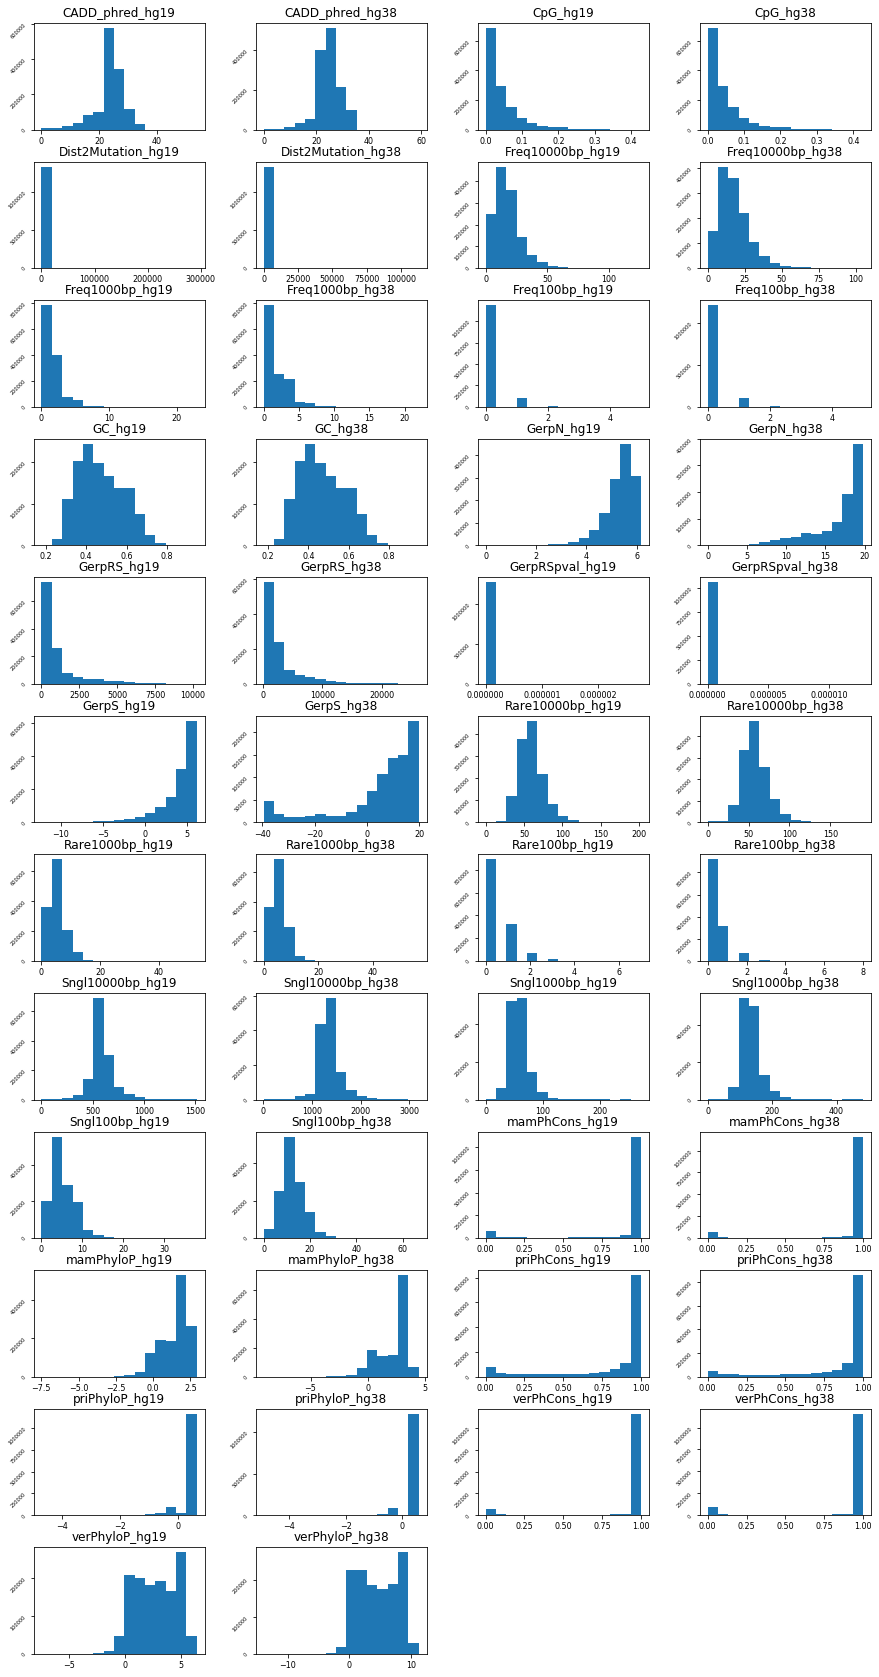

In [79]:
pd.options.display.float_format = '{:.4f}'.format

combo.hist(figsize=(15,30), layout=(12,4), grid=False, yrot=45, ylabelsize=5, xlabelsize=8, bins=15)
plt.savefig('COMBO_col_histogramgrid_notnormal.png')
plt.show()

# data is not normally distributed and does not have equal variance for all columns- 
options of using WILCOX or WELCH


<https://stats.stackexchange.com/questions/305/when-conducting-a-t-test-why-would-one-prefer-to-assume-or-test-for-equal-vari>
The second (older) recommendation is from Coombs et al. (1996, p. 148): "In summary, the independent samples t test is generally acceptable in terms of controlling Type I error rates provided there are sufficiently large equal-sized samples, even when the equal population variance assumption is violated. **For unequal-sized samples, however, an alternative that does not assume equal population variances is preferable.** Use the James second-order test when distributions are either short-tailed symmetric or normal. **Promising alternatives include the Wilcox H and Yuen trimmed means tests, which provide broader control of Type I error rates than either the Welch test or the James test and have greater power when data are long-tailed."**

> Coombs WT, Algina J, Oltman D. 1996. Univariate and multivariate omnibus hypothesis tests selected to control type I error rates when population variances are not necessarily equal. Rev Educ Res 66:137–79.

### scipy.stats.wilcoxon is the non parametric version of paired T test so not using becuase hg19 and hg38 are independent

### Welch T test from wiki:
<https://en.m.wikipedia.org/wiki/Welch%27s_t-test>
Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test,[1] and is more reliable when the two samples have unequal variances and/or unequal sample sizes.

In [ ]:
scipy.stats.ttest_ind(a, b, axis=0, equal_var=False)

In [70]:
phred38 = combo.CADD_phred_hg38
phred19 = combo.CADD_phred_hg19
scipy.stats.ttest_ind(phred38, phred19, equal_var=True)

Ttest_indResult(statistic=196.91757457180896, pvalue=0.0)

---
---
---




# R ODDS RATIO figure prep
1.5.2020

In [3]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES/")

In [7]:
# combining AA pos specifc cadd max and avg to create DETECTED VS NOT DETECTED.
cdet = pd.read_csv("POSspecific_C_detected_maxmean_6057x2.csv")
cnot = pd.read_csv("POSspecific_C_notdetected_maxmean_34050x2.csv")
kdet = pd.read_csv("POSspecific_K_detected_maxmean_8868x2.csv")
knot = pd.read_csv("POSspecific_K_notdetected_maxmean_140652x2.csv")

keepme = ['pos_ID', 'xref', 'CADD_avg', 'CADD_max',
       'assembly']
cdet = cdet[keepme].copy()
cnot = cnot[keepme].copy()
cdet['group'] = 'Labeled'
cnot['group'] = 'Unlabeled'
kdet = kdet[keepme].copy()
knot = knot[keepme].copy()
kdet['group'] = 'Labeled'
knot['group'] = 'Unlabeled'
cgroup = pd.concat([cdet, cnot], ignore_index=True, sort=False)
kgroup = pd.concat([kdet, knot], ignore_index=True, sort=False)

cdes = cgroup.describe()
cdes.to_csv("Cdescribe_hg19and38_labeled_unlabeled_CADDmaxavg.csv")
kdes = kgroup.describe()
kdes.to_csv("Kdescribe_hg19and38_labeled_unlabeled_CADDmaxavg.csv")

In [20]:
print(kdes)
print(cdes)

            CADD_avg       CADD_max
count  299040.000000  299040.000000
mean       24.125650      26.998326
std         4.074872       4.206454
min         0.019143       0.059000
25%        22.661429      24.400000
50%        24.542857      27.100000
75%        26.542857      29.700000
max        36.285714      57.000000
           CADD_avg      CADD_max
count  80214.000000  80214.000000
mean      24.927477     27.737884
std        5.071681      4.745007
min        0.036429      0.116000
25%       23.195357     24.900000
50%       25.885714     28.200000
75%       28.157143     32.000000
max       35.000000     59.000000


In [15]:
kgroup

,pos_ID,xref,CADD_avg,CADD_max,assembly,group
0,A0AVT1_K1014,A0AVT1,25.171429,32.0,hg19,Labeled
1,A0AVT1_K1014,A0AVT1,25.142857,32.0,hg38,Labeled
2,A0AVT1_K409,A0AVT1,25.600000,27.6,hg19,Labeled
3,A0AVT1_K409,A0AVT1,26.371429,29.2,hg38,Labeled
4,A0AVT1_K544,A0AVT1,25.700000,28.0,hg19,Labeled
...,...,...,...,...,...,...
299035,Q9Y6Y8_K938,Q9Y6Y8,26.885714,33.0,hg38,Unlabeled
299036,Q9Y6Y8_K955,Q9Y6Y8,25.128571,27.0,hg19,Unlabeled
299037,Q9Y6Y8_K955,Q9Y6Y8,28.528571,33.0,hg38,Unlabeled
299038,Q9Y6Y8_K985,Q9Y6Y8,25.914286,28.4,hg19,Unlabeled


In [22]:
cdet_ls = list(set(cdet['xref']))
print(len(cdet_ls))

2824


In [23]:
kdet_ls = list(set(kdet['xref']))
print(len(kdet_ls))

2559


In [26]:
detlist = cdet_ls + kdet_ls
detlist = list(set(detlist))
print(len(detlist))

3840


# GENE level file filter with C and K detected IDs

In [24]:
ukbgnomad = pd.read_csv("UKBccds_addedColumns_gnomadTX_match_04_2019.csv")
print(len(set(ukbgnomad['ID'])))
# adding labels for detected C and K to gnomad ukb file
ukblabeled = addcolumnconditional(detlist, ukbgnomad, 'ID', 'DetectedID')
ukblabeled = addcolumnconditional(cdet_ls, ukblabeled, 'ID', 'CysDetectedID')
ukblabeled = addcolumnconditional(kdet_ls, ukblabeled, 'ID', 'LysDetectedID')
print(ukblabeled.head(2))

# dropping proseq col and saving
ukblabeled= ukblabeled[['ID',  'Length', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U',
       'V', 'W', 'X', 'Y', 'Z', 'QuantA', 'QuantC', 'QuantD', 'QuantE',
       'QuantF', 'QuantG', 'QuantH', 'QuantI', 'QuantK', 'QuantL', 'QuantM',
       'QuantN', 'QuantP', 'QuantQ', 'QuantR', 'QuantS', 'QuantT', 'QuantV',
       'QuantW', 'QuantY', 'Low_A', 'Low_C', 'Low_D', 'Low_E', 'Low_F',
       'Low_G', 'Low_H', 'Low_I', 'Low_K', 'Low_L', 'Low_M', 'Low_N', 'Low_P',
       'Low_Q', 'Low_R', 'Low_S', 'Low_T', 'Low_V', 'Low_W', 'Low_Y', 'Med_A',
       'Med_C', 'Med_D', 'Med_E', 'Med_F', 'Med_G', 'Med_H', 'Med_I', 'Med_K',
       'Med_L', 'Med_M', 'Med_N', 'Med_P', 'Med_Q', 'Med_R', 'Med_S', 'Med_T',
       'Med_V', 'Med_W', 'Med_Y', 'High_A', 'High_C', 'High_D', 'High_E',
       'High_F', 'High_G', 'High_H', 'High_I', 'High_K', 'High_L', 'High_M',
       'High_N', 'High_P', 'High_Q', 'High_R', 'High_S', 'High_T', 'High_V',
       'High_W', 'High_Y', 'gene', 'transcript', 'oe_mis', 'oe_syn', 'pLI',
       'oe_lof', 'oe_syn_lower', 'oe_syn_upper', 'oe_mis_lower',
       'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'no_lofs', 'obs_het_lof',
       'obs_hom_lof', 'exp_hom_lof', 'gene_id', 'exac_pLI', 'chromosome',
       'start_position', 'end_position', 'pli_constrained',
       'pli_mostconstrained', 'pli_verymostconstrained', 'oeLOF_bins',
       'oeLOF0', 'LOEUF_bins', 'oemis_bins', 'oesyn_bins', 'LOEUF0', 'MOEUF0',
       'SOEUF0', 'DetectedID', 'CysDetectedID', 'LysDetectedID']].copy()

ukblabeled.to_csv("Rodds_gnomadconstraint_UKBabundance_labeled_notcols_16946IDs.csv", index=False)

,ID,entryName,Length,proSequence,A,B,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,U,V,W,X,Y,Z,QuantA,QuantC,QuantD,QuantE,QuantF,QuantG,QuantH,QuantI,QuantK,QuantL,QuantM,QuantN,QuantP,QuantQ,QuantR,QuantS,QuantT,QuantV,QuantW,QuantY,Low_A,Low_C,Low_D,Low_E,Low_F,Low_G,Low_H,Low_I,Low_K,Low_L,Low_M,Low_N,Low_P,Low_Q,Low_R,Low_S,Low_T,Low_V,Low_W,Low_Y,Med_A,Med_C,Med_D,Med_E,Med_F,Med_G,Med_H,Med_I,Med_K,Med_L,Med_M,Med_N,Med_P,Med_Q,Med_R,Med_S,Med_T,Med_V,Med_W,Med_Y,High_A,High_C,High_D,High_E,High_F,High_G,High_H,High_I,High_K,High_L,High_M,High_N,High_P,High_Q,High_R,High_S,High_T,High_V,High_W,High_Y,gene,transcript,oe_mis,oe_syn,pLI,oe_lof,oe_syn_lower,oe_syn_upper,oe_mis_lower,oe_mis_upper,oe_lof_lower,oe_lof_upper,oe_lof_upper_rank,oe_lof_upper_bin,oe_lof_upper_bin_6,no_lofs,obs_het_lof,obs_hom_lof,exp_hom_lof,gene_id,exac_pLI,chromosome,start_position,end_position,pli_constrained,pli_mostconstrained,pli_verymostconstrained,oeLOF_bins,oeLOF0,LOEUF_bins,oemis_bins,oesyn_bins,LOEUF0,MOEUF0,SOEUF0
0,O95139,NDUB6_HUMAN,128,MTGYTPDEKLRLQQLRELRRRWLKDQELSPREPVLPPQKMGPMEKF...,0.0000,0,0.0000,0.0312,0.0859,0.0469,0.0469,0.0469,0.0547,0.1094,0.0781,0.0469,0.0156,0.1016,0.0391,0.0625,0.0391,0.0391,0.0,0.0781,0.0312,0,0.0469,0,0,0,0,2,2,0,2,2,2,0,2,0,2,1,1,0,0,2,2,2,True,True,True,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,True,False,True,False,False,False,False,True,True,True,NDUFB6,ENST00000379847,1.10320,1.35300,1.620100e-04,0.88786,1.015,1.793,0.909,1.346,0.483,1.668,16608.0,8,5,125727.0,16,0,0.000509,ENSG00000165264,0.047218,9,32552997,32573160,False,False,False,9,False,9,10,10,False,False,False
1,O75438,NDUB1_HUMAN,58,MVNLLQIVRDHWVHVLVPMGFVIGCYLDRKSDERLTAFRNKSMLFK...,0.0172,0,0.0172,0.0517,0.0690,0.0517,0.0345,0.0345,0.0345,0.0690,0.1207,0.0517,0.0345,0.0345,0.0345,0.0862,0.0517,0.0345,0.0,0.1207,0.0345,0,0.0172,0,0,1,1,1,2,0,2,0,2,2,2,1,0,0,2,0,0,2,2,0,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,False,False,True,False,False,True,True,False,NDUFB1,ENST00000329559,1.07320,1.15500,3.590800e-05,1.27590,0.845,1.599,0.882,1.313,0.668,1.897,18441.0,9,5,125730.0,15,0,0.000447,ENSG00000183648,0.311680,14,92582466,92588261,False,False,False,10,False,10,9,9,False,False,False
2,Q8N4C6,NIN_HUMAN,2090,MDEVEQDQHEARLKELFDSFDTTGTGSLGQEELTDLCHMLSLEEVA...,0.0440,0,0.0177,0.0392,0.1569,0.0187,0.0311,0.0297,0.0282,0.0742,0.1349,0.0244,0.0435,0.0206,0.0957,0.0560,0.0718,0.0478,0.0,0.0474,0.0072,0,0.0110,0,0,1,0,2,0,0,2,0,2,2,1,2,0,2,1,1,1,0,0,0,True,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,False,False,False,False,False,NIN,ENST00000382041,0.97176,0.93618,9.633500e-09,0.32452,0.861,1.018,0.923,1.023,0.248,0.429,3944.0,2,1,125652.0,95,1,0.018329,ENSG00000100503,0.000009,14,51186481,51297839,False,False,False,4,False,3,8,3,False,False,False


# CADD MISSENSE change specific C and K subgroup R prep

In [35]:
cdet = pd.read_csv("CADDspecific_C_detected_104474x2.csv")
cnot = pd.read_csv("CADDspecific_C_notdetected_1222911x2.csv")
kdet = pd.read_csv("CADDspecific_K_detected_104474x2.csv")
knot = pd.read_csv("CADDspecific_K_notdetected_1222911x2.csv")
print(kdet.columns)
print()
print(knot.columns)

# cys simplify col
keepme = ['xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID', 'Cys_reactivity',
       'Cys_react_threshold', 'Cys_target_label', 'geneNamePrimary',
       'CADD_score', 'assembly']
keepme2 = ['xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID',
       'geneNamePrimary', 'CADD_score', 'assembly']
# lysine simplify col
kkeepme = ['xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID', 'Lys_reactivity',
       'Lys_react_threshold', 'Lys_target_label', 'geneNamePrimary',
       'CADD_score', 'assembly']
cdet = cdet[keepme].copy()
cnot=cnot[keepme2].copy()
kdet = kdet[kkeepme].copy()
knot=knot[keepme2].copy()

Cresult = cdet.append(cnot, ignore_index=True, sort=False)
Kresult = kdet.append(knot, ignore_index=True, sort=False)
# Cresult.shape (561496, 12)
# 561496/2 = 280748.0 # total C missense both detected and not

# Kresult.shape (2093276, 12)
# 2093276/2 = 1046638 # total K missense both detected and not
Cresult.to_csv("Rodds_missense_CysLOST_allgroups_280748x2.csv",index=False)
Kresult.to_csv("Rodds_missense_LysLOST_allgroups_1046638x2.csv", index=False)

Index(['Unnamed: 0', 'pos_id19', 'pos_id38', 'xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID', 'Lys_reactivity',
       'Lys_react_threshold', 'Lys_target_label', 'geneNamePrimary',
       'CADD_score', 'assembly', 'posID14925'],
      dtype='object')

Index(['Unnamed: 0', 'pos_id19', 'pos_id38', 'xref', 'matched_target',
       'lost_amino', 'gained_amino', 'Amino_acids', 'pos_ID',
       'geneNamePrimary', 'CADD_score', 'assembly'],
      dtype='object')


# missense specific for subgroups (reactive High vs LowMed & Target vs Panreactive)

In [7]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES")

In [8]:
det = pd.read_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475.csv", na_values='.', low_memory=False)
notdet = pd.read_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911.csv", na_values='.', low_memory=False)
# replaced '.' with nan values

# saving files with nan instead of '.' value
det.to_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475_fixednull.csv", index=False)
notdet.to_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911_fixednull.csv", index=False)

# making Rodds ratio specific files 
- added col handles for reactive groups and pantarget groups
- created 2 version Rodds and Ross_selectCols


In [12]:
# filtering for rows that dont have nan values in reactivity or pantarget col
react_cys = det[det['Cys_react_threshold'].notnull()]
print(react_cys.shape)
react_lys = det[det['Lys_react_threshold'].notnull()]
print(react_lys.shape)
pan_cys = det[det['Cys_target_label'].notnull()]
print(pan_cys.shape)
pan_lys = det[det['Lys_target_label'].notnull()]
print(pan_lys.shape)

(9807, 143)
(30541, 143)
(40572, 143)
(55685, 143)


In [53]:
# new col for R label True is HIGH value and False if LOWMEDIUM
# new col for panreactive True if Target False if panreactive
def relabel_reactiveC(row):
    if row['Cys_react_threshold'] == "High":
        return 'True'
    if row['Cys_react_threshold'] == "Low":
        return 'False'
    if row['Cys_react_threshold'] == "Medium":
        return 'False'
    return 'Other'

def relabel_reactiveK(row):    
    if row['Lys_react_threshold'] == "High":
        return 'True'
    if row['Lys_react_threshold'] == "Low":
        return 'False'
    if row['Lys_react_threshold'] == "Medium":
        return 'False'
    return 'Other'

def relabel_targetC(row):
    if row['Cys_target_label'] == "Target":
        return 'True'
    if row['Cys_target_label'] == "panReactive":
        return 'False'
    return 'Other'


def relabel_targetK(row):    
    if row['Lys_target_label'] == "Target":
        return 'True'
    if row['Lys_target_label'] == "panReactive":
        return 'False'
    return 'Other'

react_cys['HIGH_subgroup'] = react_cys.apply(lambda row: relabel_reactiveC(row), axis=1)
react_lys['HIGH_subgroup'] = react_lys.apply(lambda row: relabel_reactiveK(row), axis=1)
pan_cys['TARGET_subgroup'] = pan_cys.apply(lambda row: relabel_targetC(row), axis=1)
pan_lys['TARGET_subgroup'] = pan_lys.apply(lambda row: relabel_targetK(row), axis=1)

# have correct cadd38 phred score (using dbnsp not hoffman derived)
react_cys.to_csv("Rodds_reactive_cys_HvsLM_9807missense.csv", index=False)
react_lys.to_csv("Rodds_reactive_lys_HvsLM_30541missense.csv", index=False)
pan_cys.to_csv("Rodds_pantarget_cys_TvsPR_40572missense.csv", index=False)
pan_lys.to_csv("Rodds_pantarget_lys_TvsPR_55685missense.csv", index=False)

/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [73]:
# creating description file for Rodds_selectCOl files saved (deleted col selecting and saving of files)
saveColumnValues(react_cys_simple, 'Amino_acids', 'AAcounts_reactive_cys_9807.csv')
saveColumnValues(react_lys_simple, 'Amino_acids', 'AAcounts_reactive_lys_30541.csv')
saveColumnValues(pan_cys_simple, 'Amino_acids', 'AAcounts_pantarget_cys_40572.csv')
saveColumnValues(pan_lys_simple, 'Amino_acids', 'AAcounts_pantarget_lys_55685.csv')

saved!

  Amino_acids  Count
0     Cys/Ser   2802
1     Cys/Trp   1401
2     Cys/Tyr   1401
3     Cys/Phe   1401
4     Cys/Gly   1401
5     Cys/Arg   1401

saved!

  Amino_acids  Count
0     Lys/Asn   8726
1     Lys/Gln   4363
2     Lys/Glu   4363
3     Lys/Arg   4363
4     Lys/Thr   4363
5     Lys/Met   2640
6     Lys/Ile   1723

saved!

  Amino_acids  Count
0     Cys/Ser  11592
1     Cys/Tyr   5796
2     Cys/Trp   5796
3     Cys/Phe   5796
4     Cys/Gly   5796
5     Cys/Arg   5796

saved!

  Amino_acids  Count
0     Lys/Asn  15910
1     Lys/Thr   7955
2     Lys/Gln   7955
3     Lys/Glu   7955
4     Lys/Arg   7955
5     Lys/Met   4732
6     Lys/Ile   3223


# testing different score thresholds to make odds ratio table
- recorded proportions in excel for mapping project

In [112]:
react_cys_simple[react_cys_simple['CADD_phred_hg38'] >= 26]

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
106,Q01813_C179,C179,Q01813,C,R,Cys/Arg,26.3,25.1,1.2,2.20,Medium,Target,0.990211,0.94064,D,AEFBHCI,False
107,Q01813_C179,C179,Q01813,C,G,Cys/Gly,26.1,24.6,1.5,2.20,Medium,Target,0.962693,0.94789,D,AEFBHCI,False
108,Q01813_C179,C179,Q01813,C,Y,Cys/Tyr,27.1,25.1,2.0,2.20,Medium,Target,0.988312,0.96384,D,AEFBHCI,False
110,Q01813_C179,C179,Q01813,C,F,Cys/Phe,27.7,25.4,2.3,2.20,Medium,Target,0.991796,0.96671,D,AEFBHCI,False
364,A6NHL2_C354,C354,A6NHL2,C,W,Cys/Trp,28.3,23.2,5.1,4.68,Medium,NaN,0.992225,0.93967,D,AEFDBI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104376,Q00013_C242,C242,Q00013,C,S,Cys/Ser,26.0,24.8,1.2,7.15,Low,panReactive,0.993284,0.97025,D,AEFBCI,False
104377,Q00013_C179,C179,Q00013,C,W,Cys/Trp,26.8,25.6,1.2,4.70,Medium,Target,0.993266,0.93067,D,AEFDBCI,False
104381,Q00013_C179,C179,Q00013,C,G,Cys/Gly,27.5,26.0,1.5,4.70,Medium,Target,0.984040,0.96656,D,AEFDBCI,False
104382,Q00013_C179,C179,Q00013,C,R,Cys/Arg,27.6,26.5,1.1,4.70,Medium,Target,0.996228,0.96781,D,AEFDBCI,False


In [111]:
react_cys_simple[react_cys_simple['DANN_score'] >= 0.98]

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
106,Q01813_C179,C179,Q01813,C,R,Cys/Arg,26.30,25.1,1.20,2.20,Medium,Target,0.990211,0.94064,D,AEFBHCI,False
108,Q01813_C179,C179,Q01813,C,Y,Cys/Tyr,27.10,25.1,2.00,2.20,Medium,Target,0.988312,0.96384,D,AEFBHCI,False
110,Q01813_C179,C179,Q01813,C,F,Cys/Phe,27.70,25.4,2.30,2.20,Medium,Target,0.991796,0.96671,D,AEFBHCI,False
111,Q01813_C179,C179,Q01813,C,W,Cys/Trp,21.30,21.0,0.30,2.20,Medium,Target,0.980562,0.59787,D,AEFBHCI,False
339,P42330_C242,C242,P42330,C,Y,Cys/Tyr,19.17,17.4,1.77,7.48,Low,panReactive,0.980096,0.00287,N,AEFI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104379,Q00013_C179,C179,Q00013,C,S,Cys/Ser,25.30,26.7,-1.40,4.70,Medium,Target,0.995210,0.97456,D,AEFDBCI,False
104380,Q00013_C179,C179,Q00013,C,Y,Cys/Tyr,25.60,28.2,-2.60,4.70,Medium,Target,0.997546,0.96794,D,AEFDBCI,False
104381,Q00013_C179,C179,Q00013,C,G,Cys/Gly,27.50,26.0,1.50,4.70,Medium,Target,0.984040,0.96656,D,AEFDBCI,False
104382,Q00013_C179,C179,Q00013,C,R,Cys/Arg,27.60,26.5,1.10,4.70,Medium,Target,0.996228,0.96781,D,AEFDBCI,False


In [107]:
react_cys_simple[react_cys_simple['fathmmMKL_coding_score'] >= 0.95]

,pos_ID,matched_target,matched_UKBID,aaref,aaalt,Amino_acids,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,Cys_reactivity,Cys_react_threshold,Cys_target_label,DANN_score,fathmmMKL_coding_score,fathmmMKL_coding_pred,fathmmMKL_coding_group,HIGH_subgroup
108,Q01813_C179,C179,Q01813,C,Y,Cys/Tyr,27.1,25.1,2.0,2.20,Medium,Target,0.988312,0.96384,D,AEFBHCI,False
109,Q01813_C179,C179,Q01813,C,S,Cys/Ser,24.6,23.3,1.3,2.20,Medium,Target,0.934915,0.96915,D,AEFBHCI,False
110,Q01813_C179,C179,Q01813,C,F,Cys/Phe,27.7,25.4,2.3,2.20,Medium,Target,0.991796,0.96671,D,AEFBHCI,False
365,A6NHL2_C354,C354,A6NHL2,C,F,Cys/Phe,24.7,22.5,2.2,4.68,Medium,NaN,0.992157,0.97283,D,AEFDBI,False
366,A6NHL2_C354,C354,A6NHL2,C,S,Cys/Ser,27.2,23.4,3.8,4.68,Medium,NaN,0.991060,0.98204,D,AEFDBI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104379,Q00013_C179,C179,Q00013,C,S,Cys/Ser,25.3,26.7,-1.4,4.70,Medium,Target,0.995210,0.97456,D,AEFDBCI,False
104380,Q00013_C179,C179,Q00013,C,Y,Cys/Tyr,25.6,28.2,-2.6,4.70,Medium,Target,0.997546,0.96794,D,AEFDBCI,False
104381,Q00013_C179,C179,Q00013,C,G,Cys/Gly,27.5,26.0,1.5,4.70,Medium,Target,0.984040,0.96656,D,AEFDBCI,False
104382,Q00013_C179,C179,Q00013,C,R,Cys/Arg,27.6,26.5,1.1,4.70,Medium,Target,0.996228,0.96781,D,AEFDBCI,False


# FIXING cadd38 phred and raw scores 

hoffman cadd/GRCh38 dir with error containing chr chunks files (phred and raw score col names messed up initially) solution = 
    - 2 files with corrected CADDv1.4 GRCh38 raw and phred scores
    - created to make up for hoffman cadd 38 files w/ error in columns of file
    - corrected hoffman by re parsing cadd full annotation file for 38


In [ ]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES")

In [27]:
# files with incorrect cadd38 (from hoffman) raw and phred columns
det = pd.read_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475_fixednull.csv", low_memory=False)
notdet = pd.read_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911_fixednull.csv", low_memory=False)
# drop error columns
det.drop('RawScore_hg38', axis=1, inplace=True) 
det.drop('PHRED_hg38', axis=1, inplace=True) 
notdet.drop('RawScore_hg38', axis=1, inplace=True) 
notdet.drop('PHRED_hg38', axis=1, inplace=True) 

# correct cadd38 scores from dbnsfp
notcadd = pd.read_csv("CADD38_raw_phred_fromdbNSFP_notdetected.csv")
detcadd = pd.read_csv("CADD38_raw_phred_fromdbNSFP_detected.csv")

# correcting cadd 38 raw and phred by merging 
det2 = pd.merge(det, detcadd, how='inner', on=['pos_id38'])
notdet2 = pd.merge(notdet, notcadd, how = 'inner', on=['pos_id38'])

# SAVING CORRECTED FILES WITH CADD38 RAW AND PHRED SCORES
det2.to_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475_fixednullcadd38.csv", index=False)
notdet2.to_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911_fixednullcadd38.csv", index=False)


print(notcadd.shape)
print(detcadd.shape)
print("merge to filtered files:")
print(notdet.shape)
print(det.shape)
print()
print("post merge, should match ^: ")
print(notdet2.shape)
print(det2.shape)

(1259801, 4)
(106064, 4)
merge to filtered files:
(1222911, 134)
(104475, 141)

post merge, should match ^: 
(1222911, 137)
(104475, 144)


# RAW scores file for detected and not detected CK postions
## R figures line plot correlations

```python
# columns: 
    pos_id19|38
    pos_ID(ukb)
    reactivity / target info
    codon info
    M-CAP 3
    REVEL 2
    MPC 2
    PrimateAI 3
    DANN 2 
    fathmm-MKL_coding 3
    mamPhCons_hg19|38 1
    CADD phred 19 #from CADD/ on hoffman
    CADD raw 19 #from CADD/ on hoffman
## merging new columns from dbNSFP
    CADD38 phred
    CADD38 raw
## delete
    RawScore_hg38,PHRED_hg38
```

In [39]:
det = det2[['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'M-CAP_score', 'M-CAP_rankscore', 'M-CAP_pred', 
        'REVEL_score','REVEL_rankscore','MPC_score', 'MPC_rankscore',
        'PrimateAI_score', 'PrimateAI_rankscore',
       'PrimateAI_pred', 'DANN_score', 'DANN_rankscore',
       'fathmm-MKL_coding_score', 'fathmm-MKL_coding_rankscore',
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group','RawScore_hg19',
        'PHRED_hg19', 'CADD38_raw','CADD38_raw_rankscore', 'CADD38_phred']].copy()

In [42]:
notdet = notdet2[['pos_id19', 'pos_id38', 'pos_ID', 'matched_UKBID', 'matched_aapos',
       'matched_index', 'Ensembl_transcriptid', 'Amino_acids', 'aaref',
       'aaalt', 'CADD_phred_hg38', 'CADD_phred_hg19', 'CADDdiff_38minus19','M-CAP_score', 'M-CAP_rankscore', 
       'M-CAP_pred', 'REVEL_score','REVEL_rankscore',
       'MPC_score', 'MPC_rankscore', 'PrimateAI_score', 
       'PrimateAI_rankscore','PrimateAI_pred', 'DANN_score', 'DANN_rankscore',
       'fathmm-MKL_coding_score', 'fathmm-MKL_coding_rankscore',
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group','RawScore_hg19', 
        'PHRED_hg19', 'CADD38_raw','CADD38_raw_rankscore', 'CADD38_phred']].copy()


In [50]:
describeMe(det)

(104475, 41)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'matched_index', 'pos_dict', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'M-CAP_score', 'M-CAP_rankscore', 'M-CAP_pred',
       'REVEL_score', 'REVEL_rankscore', 'MPC_score', 'MPC_rankscore',
       'PrimateAI_score', 'PrimateAI_rankscore', 'PrimateAI_pred',
       'DANN_score', 'DANN_rankscore', 'fathmm-MKL_coding_score',
       'fathmm-MKL_coding_rankscore', 'fathmm-MKL_coding_pred',
       'fathmm-MKL_coding_group', 'RawScore_hg19', 'PHRED_hg19', 'CADD38_raw',
       'CADD38_raw_rankscore', 'CADD38_phred'],
      dtype='object')
pos_id19                           0
pos_id38                           0
pos_ID                             0
matched_aapos                      0
ma

In [49]:
describeMe(notdet)

(1222911, 34)
Index(['pos_id19', 'pos_id38', 'pos_ID', 'matched_UKBID', 'matched_aapos',
       'matched_index', 'Ensembl_transcriptid', 'Amino_acids', 'aaref',
       'aaalt', 'CADD_phred_hg38', 'CADD_phred_hg19', 'CADDdiff_38minus19',
       'M-CAP_score', 'M-CAP_rankscore', 'M-CAP_pred', 'REVEL_score',
       'REVEL_rankscore', 'MPC_score', 'MPC_rankscore', 'PrimateAI_score',
       'PrimateAI_rankscore', 'PrimateAI_pred', 'DANN_score', 'DANN_rankscore',
       'fathmm-MKL_coding_score', 'fathmm-MKL_coding_rankscore',
       'fathmm-MKL_coding_pred', 'fathmm-MKL_coding_group', 'RawScore_hg19',
       'PHRED_hg19', 'CADD38_raw', 'CADD38_raw_rankscore', 'CADD38_phred'],
      dtype='object')
pos_id19                            0
pos_id38                            0
pos_ID                              0
matched_UKBID                       0
matched_aapos                       0
matched_index                       0
Ensembl_transcriptid                0
Amino_acids                     

In [51]:
# SAVING CORRECTED FILES WITH CADD38 RAW AND PHRED SCORES
det.to_csv("Rfig_SCORES_DETECTED_CK_104475.csv", index=False)
notdet.to_csv("Rfig_SCORES_NOT_DETECTED_CK_1222911.csv", index=False)

In [60]:
# simplifying to raw score columns

rdet = det[['pos_id19', 'pos_id38', 'pos_ID', 'matched_aapos', 'matched_target',
       'matched_UKBID', 'aaref', 'aaalt',
       'Amino_acids', 'CADD_phred_hg38', 'CADD_phred_hg19',
       'CADDdiff_38minus19', 'Cys_reactivity', 'Cys_react_threshold',
       'Cys_target_label', 'Lys_reactivity', 'Lys_react_threshold',
       'Lys_target_label', 'M-CAP_score', 
       'REVEL_score', 'MPC_score', 
       'PrimateAI_score', 
       'DANN_score', 'fathmm-MKL_coding_score',
       'RawScore_hg19', 'PHRED_hg19', 'CADD38_raw',
       'CADD38_phred']].copy()

rnot = notdet[['pos_id19', 'pos_id38', 'pos_ID', 'matched_UKBID', 'matched_aapos',
      'Amino_acids', 'aaref','aaalt', 'CADD_phred_hg38', 'CADD_phred_hg19', 
       'M-CAP_score', 'REVEL_score', 'MPC_score', 'PrimateAI_score','DANN_score',
       'fathmm-MKL_coding_score', 'RawScore_hg19','PHRED_hg19', 
        'CADD38_raw', 'CADD38_phred']].copy()

In [79]:
def add_maxmean_col(df, scorecol):
    maxscore = scorecol + "_max"
    meanscore = scorecol + "_mean"
    # grouping on pos_ID
    df[scorecol] = df[scorecol].astype(float)
    df = df.groupby('pos_ID',sort=False)[scorecol].apply(list)
    # convert back to pd dataframe
    df = pd.DataFrame(df)
    df[meanscore] = df[scorecol].apply(lambda x: mean(x))
    df[maxscore] = df[scorecol].apply(lambda x: max(x))
    #df.reset_index(inplace=True)
    df.drop(scorecol, axis=1, inplace=True)
    return df

In [72]:
rtest1 = add_maxmean_col(rdet, 'CADD_phred_hg38')
rtest2 = add_maxmean_col(rdet, 'CADD_phred_hg19')
rtest3 = add_maxmean_col(rdet, 'M-CAP_score')
rtest4 = add_maxmean_col(rdet, 'REVEL_score')
rtest5 = add_maxmean_col(rdet, 'MPC_score')
rtest6 = add_maxmean_col(rdet, 'PrimateAI_score')
rtest7 = add_maxmean_col(rdet, 'DANN_score')
rtest8 = add_maxmean_col(rdet, 'fathmm-MKL_coding_score')
rtest9 = add_maxmean_col(rdet, 'RawScore_hg19')
rtest10 = add_maxmean_col(rdet, 'PHRED_hg19')
rtest11 = add_maxmean_col(rdet, 'CADD38_raw')
rtest12 = add_maxmean_col(rdet, 'CADD38_phred')
result = pd.concat([rtest1,rtest2,rtest3,rtest4,rtest5,
                    rtest6,rtest7,rtest8,rtest9,rtest10,rtest11,rtest12], axis=1)
result

In [80]:
rtest1 = add_maxmean_col(rnot, 'CADD_phred_hg38')
rtest2 = add_maxmean_col(rnot, 'CADD_phred_hg19')
rtest3 = add_maxmean_col(rnot, 'M-CAP_score')
rtest4 = add_maxmean_col(rnot, 'REVEL_score')
rtest5 = add_maxmean_col(rnot, 'MPC_score')
rtest6 = add_maxmean_col(rnot, 'PrimateAI_score')
rtest7 = add_maxmean_col(rnot, 'DANN_score')
rtest8 = add_maxmean_col(rnot, 'fathmm-MKL_coding_score')
rtest9 = add_maxmean_col(rnot, 'RawScore_hg19')
rtest10 = add_maxmean_col(rnot, 'PHRED_hg19')
rtest11 = add_maxmean_col(rnot, 'CADD38_raw')
rtest12 = add_maxmean_col(rnot, 'CADD38_phred')
resultnot = pd.concat([rtest1,rtest2,rtest3,rtest4,rtest5,
                    rtest6,rtest7,rtest8,rtest9,rtest10,rtest11,rtest12], axis=1)
resultnot

,CADD_phred_hg38_mean,CADD_phred_hg38_max,CADD_phred_hg19_mean,CADD_phred_hg19_max,M-CAP_score_mean,M-CAP_score_max,REVEL_score_mean,REVEL_score_max,MPC_score_mean,MPC_score_max,PrimateAI_score_mean,PrimateAI_score_max,DANN_score_mean,DANN_score_max,fathmm-MKL_coding_score_mean,fathmm-MKL_coding_score_max,RawScore_hg19_mean,RawScore_hg19_max,PHRED_hg19_mean,PHRED_hg19_max,CADD38_raw_mean,CADD38_raw_max,CADD38_phred_mean,CADD38_phred_max
pos_ID,,,,,,,,,,,,,,,,,,,,,,,,
Q3ZCM7_K392,23.028571,23.5,22.742857,23.2,0.015016,0.026689,0.481857,0.532,NaN,NaN,0.732551,0.751451,0.975967,0.984728,0.485569,0.54294,2.622317,2.819085,22.742857,23.2,3.020897,3.242521,23.028571,23.5
Q3ZCM7_K379,20.592857,23.4,17.397714,21.6,0.055635,0.151537,0.311571,0.439,NaN,NaN,0.553263,0.568197,0.636763,0.857882,0.367680,0.54294,1.688149,2.237186,17.397714,21.6,2.394219,3.186767,20.592857,23.4
Q3ZCM7_K362,22.314286,23.0,18.657143,22.0,0.023702,0.031562,0.371571,0.419,NaN,NaN,0.595148,0.616875,0.729453,0.943335,0.428963,0.55584,1.882726,2.300845,18.657143,22.0,2.703938,3.014369,22.314286,23.0
Q3ZCM7_K350,22.400000,23.0,20.270000,22.0,0.019858,0.029792,0.380143,0.434,NaN,NaN,0.714157,0.729919,0.879813,0.962226,0.445074,0.55584,2.086579,2.317310,20.270000,22.0,2.755410,3.010656,22.400000,23.0
Q3ZCM7_K336,22.842857,23.5,20.990000,22.2,0.020661,0.027486,0.383571,0.429,NaN,NaN,0.789373,0.801953,0.860079,0.937110,0.473303,0.55584,2.177234,2.367924,20.990000,22.2,2.923229,3.236984,22.842857,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O14602_K56,22.685714,25.4,19.840000,24.0,0.035440,0.060309,NaN,NaN,0.452468,0.746148,NaN,NaN,0.985692,0.995716,0.551041,0.61886,2.154585,3.154863,19.840000,24.0,2.807262,3.804947,22.685714,25.4
O14602_C59,23.942857,25.1,23.171429,24.1,0.036679,0.088056,NaN,NaN,1.103986,1.290231,NaN,NaN,0.984695,0.995091,0.528501,0.67299,2.798833,3.171298,23.171429,24.1,3.365466,3.740745,23.942857,25.1
O14602_K64,23.557143,25.1,22.494286,24.5,0.026783,0.048929,NaN,NaN,0.858414,1.224819,NaN,NaN,0.992687,0.997777,0.497634,0.61886,2.777519,3.311342,22.494286,24.5,3.191680,3.730844,23.557143,25.1


In [76]:
result.describe()

,CADD_phred_hg38_mean,CADD_phred_hg38_max,CADD_phred_hg19_mean,CADD_phred_hg19_max,M-CAP_score_mean,M-CAP_score_max,REVEL_score_mean,REVEL_score_max,MPC_score_mean,MPC_score_max,PrimateAI_score_mean,PrimateAI_score_max,DANN_score_mean,DANN_score_max,fathmm-MKL_coding_score_mean,fathmm-MKL_coding_score_max,RawScore_hg19_mean,RawScore_hg19_max,PHRED_hg19_mean,PHRED_hg19_max,CADD38_raw_mean,CADD38_raw_max,CADD38_phred_mean,CADD38_phred_max
count,14925.000000,14925.000000,14925.000000,14925.000000,14726.000000,14854.000000,14919.000000,14919.000000,11047.000000,11047.000000,14662.000000,14662.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000,14925.000000
mean,25.305605,28.312111,24.054814,27.173714,0.118162,0.192665,0.381394,0.504477,1.155232,1.502052,0.695565,0.729638,0.950433,0.989257,0.853870,0.908893,3.094321,3.666985,24.054814,27.173714,3.533326,4.075150,25.305605,28.312111
std,4.008336,4.289754,4.707997,4.475855,0.168141,0.224253,0.241836,0.264682,0.821789,0.990826,0.181785,0.179310,0.094976,0.034941,0.217855,0.186045,0.884528,0.798646,4.707997,4.475855,0.832354,0.771475,4.008336,4.289754
min,1.191143,5.835000,0.019143,0.059000,0.000879,0.001464,0.011143,0.017000,0.001094,0.001695,0.180567,0.182284,0.293913,0.380309,0.001267,0.002200,-0.828285,-0.552893,0.019143,0.059000,-0.506408,0.331715,1.191143,5.835000
25%,23.371429,25.200000,22.500000,24.600000,0.020338,0.038391,0.174857,0.271000,0.488226,0.717093,0.576150,0.625172,0.954852,0.993864,0.856869,0.937950,2.643613,3.348122,22.500000,24.600000,3.116519,3.758178,23.371429,25.200000
50%,25.542857,28.500000,24.742857,27.400000,0.049360,0.096526,0.340571,0.500000,0.971141,1.318294,0.746260,0.785857,0.991369,0.997469,0.941287,0.975170,3.285610,3.941107,24.742857,27.400000,3.726972,4.302698,25.542857,28.500000
75%,27.857143,32.000000,26.928571,31.000000,0.134565,0.260961,0.558929,0.731000,1.682873,2.146034,0.843776,0.871645,0.996070,0.998455,0.971701,0.989640,3.757019,4.191634,26.928571,31.000000,4.139112,4.589753,27.857143,32.000000
max,34.714286,59.000000,34.714286,54.000000,0.993282,0.996568,0.986143,0.995000,4.556276,4.999644,0.980112,0.983329,0.998194,0.999271,0.998914,0.999610,4.969592,9.362648,34.714286,54.000000,5.382661,10.030764,34.714286,59.000000


In [77]:
describeMe(result)

(14925, 24)
Index(['CADD_phred_hg38_mean', 'CADD_phred_hg38_max', 'CADD_phred_hg19_mean',
       'CADD_phred_hg19_max', 'M-CAP_score_mean', 'M-CAP_score_max',
       'REVEL_score_mean', 'REVEL_score_max', 'MPC_score_mean',
       'MPC_score_max', 'PrimateAI_score_mean', 'PrimateAI_score_max',
       'DANN_score_mean', 'DANN_score_max', 'fathmm-MKL_coding_score_mean',
       'fathmm-MKL_coding_score_max', 'RawScore_hg19_mean',
       'RawScore_hg19_max', 'PHRED_hg19_mean', 'PHRED_hg19_max',
       'CADD38_raw_mean', 'CADD38_raw_max', 'CADD38_phred_mean',
       'CADD38_phred_max'],
      dtype='object')
CADD_phred_hg38_mean               0
CADD_phred_hg38_max                0
CADD_phred_hg19_mean               0
CADD_phred_hg19_max                0
M-CAP_score_mean                 199
M-CAP_score_max                   71
REVEL_score_mean                   6
REVEL_score_max                    6
MPC_score_mean                  3878
MPC_score_max                   3878
PrimateAI_score_mean

In [78]:
result.to_csv("Rfig_SCORES_max_mean_detected_14925.csv", index=False)

In [81]:
resultnot.describe()

,CADD_phred_hg38_mean,CADD_phred_hg38_max,CADD_phred_hg19_mean,CADD_phred_hg19_max,M-CAP_score_mean,M-CAP_score_max,REVEL_score_mean,REVEL_score_max,MPC_score_mean,MPC_score_max,PrimateAI_score_mean,PrimateAI_score_max,DANN_score_mean,DANN_score_max,fathmm-MKL_coding_score_mean,fathmm-MKL_coding_score_max,RawScore_hg19_mean,RawScore_hg19_max,PHRED_hg19_mean,PHRED_hg19_max,CADD38_raw_mean,CADD38_raw_max,CADD38_phred_mean,CADD38_phred_max
count,174702.000000,174702.000000,174702.000000,174702.000000,172592.000000,174108.000000,174624.000000,174624.000000,128148.000000,128148.000000,171677.000000,171680.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000,174702.000000
mean,24.838008,27.587601,23.686696,26.621395,0.096991,0.154475,0.317598,0.427419,0.943826,1.239110,0.653065,0.682869,0.964992,0.992064,0.848795,0.907082,3.027768,3.587588,23.686696,26.621395,3.445540,3.969779,24.838008,27.587601
std,3.849374,4.172055,4.650211,4.421265,0.155423,0.202951,0.235467,0.260421,0.725017,0.866574,0.186466,0.187591,0.074962,0.028472,0.222322,0.191638,0.887289,0.813282,4.650211,4.421265,0.823764,0.777270,3.849374,4.172055
min,0.739000,1.009000,0.022286,0.070000,0.000540,0.000640,0.002857,0.004000,0.000418,0.000561,0.167531,0.171188,0.170263,0.237464,0.000029,0.000040,-1.203883,-0.529638,0.022286,0.070000,-0.440722,-0.053131,0.739000,1.009000
25%,23.100000,24.700000,22.197143,24.300000,0.016295,0.028913,0.128143,0.203000,0.376277,0.572252,0.514310,0.549694,0.973870,0.995617,0.849976,0.937090,2.557692,3.244870,22.197143,24.300000,3.017704,3.636304,23.100000,24.700000
50%,25.057143,27.600000,24.428571,26.800000,0.037113,0.069521,0.248000,0.379000,0.744112,1.027352,0.686489,0.724777,0.992894,0.997756,0.938684,0.976450,3.210132,3.859373,24.428571,26.800000,3.622604,4.195709,25.057143,27.600000
75%,27.214286,31.000000,26.500000,29.500000,0.096493,0.182337,0.461286,0.629000,1.354942,1.747874,0.812321,0.841241,0.996587,0.998620,0.970963,0.990080,3.699083,4.135682,26.500000,29.500000,4.054633,4.494807,27.214286,31.000000
max,36.285714,57.000000,35.000000,53.000000,0.997433,0.999160,0.991286,0.998000,4.556276,4.999644,0.983147,0.987537,0.998398,0.999325,0.999999,1.000000,5.110148,9.330900,35.000000,53.000000,5.678550,9.544490,36.285714,57.000000


In [82]:
describeMe(resultnot)

(174702, 24)
Index(['CADD_phred_hg38_mean', 'CADD_phred_hg38_max', 'CADD_phred_hg19_mean',
       'CADD_phred_hg19_max', 'M-CAP_score_mean', 'M-CAP_score_max',
       'REVEL_score_mean', 'REVEL_score_max', 'MPC_score_mean',
       'MPC_score_max', 'PrimateAI_score_mean', 'PrimateAI_score_max',
       'DANN_score_mean', 'DANN_score_max', 'fathmm-MKL_coding_score_mean',
       'fathmm-MKL_coding_score_max', 'RawScore_hg19_mean',
       'RawScore_hg19_max', 'PHRED_hg19_mean', 'PHRED_hg19_max',
       'CADD38_raw_mean', 'CADD38_raw_max', 'CADD38_phred_mean',
       'CADD38_phred_max'],
      dtype='object')
CADD_phred_hg38_mean                0
CADD_phred_hg38_max                 0
CADD_phred_hg19_mean                0
CADD_phred_hg19_max                 0
M-CAP_score_mean                 2110
M-CAP_score_max                   594
REVEL_score_mean                   78
REVEL_score_max                    78
MPC_score_mean                  46554
MPC_score_max                   46554
PrimateAI

In [83]:
resultnot.to_csv("Rfig_SCORES_max_mean_not_detected_174702.csv", index=False)

In [85]:
from pandas import DataFrame
import seaborn as sn

In [94]:
result = result[['CADD_phred_hg38_max',
       'CADD_phred_hg19_max', 'M-CAP_score_max','REVEL_score_max', 
       'MPC_score_max',  'PrimateAI_score_max','DANN_score_max', 
       'fathmm-MKL_coding_score_max', 
       'RawScore_hg19_max', 'PHRED_hg19_max',
     'CADD38_raw_max', 
       'CADD38_phred_max']]

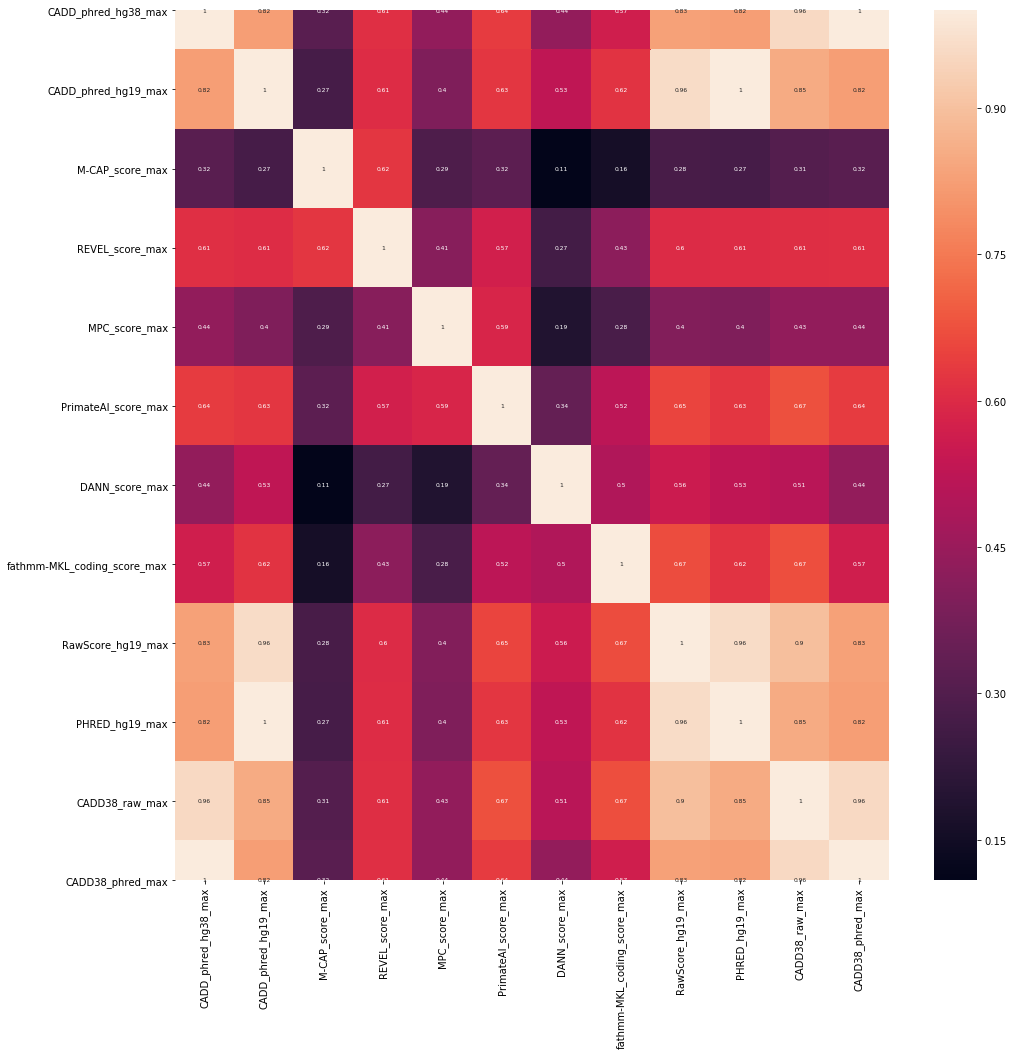

In [100]:
corrdet = result.corr()
plt.figure(figsize=(16,16))
sn.heatmap(corrdet, annot=True, annot_kws={"size": 6})
plt.savefig('correlation_matrix_detected_scoresf.png', dpi=300)
